# 1. Численная интерполяция

In [ ]:
!pip install numpy matplotlib sympy

import numpy as np
import matplotlib.pyplot as plt

In [96]:
h = 1 # интерполяционный шаг
a = 0 
b = 10

def f(x: np.ndarray) -> np.ndarray:
    return np.sin(np.exp(x / 3) / 10)

In [97]:
def new_mid_arr(array: np.ndarray) -> np.ndarray:
    return (array[:-1] + array[1:]) / 2

def chebyshev_series(a: int | float, b: int | float, num_terms: int) -> np.ndarray:
    nodes = -np.cos((2 * np.arange(num_terms, dtype=np.float128) + 1) / (2 * num_terms) * np.pi)
    return (b - a) / 2 * nodes + (a + b) / 2

def equal_series(a: int | float, b: int | float, h: int | float) -> np.ndarray:
    return np.arange(a, b + h, h, dtype=np.float128)

In [98]:
class Lagrange_polynomial():
    def __init__(self, x: np.ndarray, y: np.ndarray):
        if len(x) != len(y):
            raise Exception

        self.x = x
        self.y = y
        self.n = len(x)
    
    def solve_element(self, z: int | float) -> float:
        l_z = np.zeros(self.n, dtype=np.float128)
        for j in range(0, self.n):
            l_z[j] = (np.prod((z - np.delete(self.x, j)) / (self.x[j] - np.delete(self.x, j))))

        return sum(self.y * l_z)
    
    def solve_interpolation(self, array: np.ndarray) -> np.ndarray:
        res = np.zeros(len(array), dtype=np.float128)
        for i in range(0, len(array)):
            res[i] = self.solve_element(array[i])
        
        return  res

## Часть А

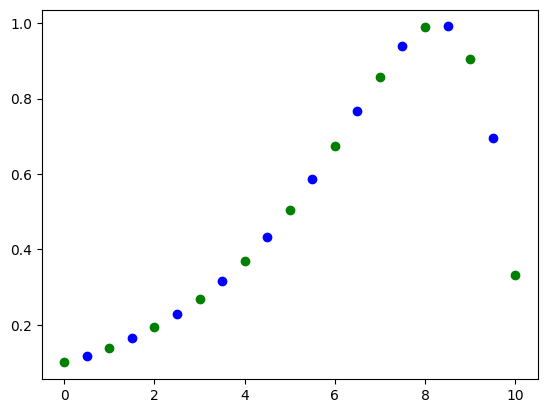

In [99]:
interval = equal_series(a, b, h)
interval0 = new_mid_arr(interval)

poly = Lagrange_polynomial(interval, f(interval))

solution = poly.solve_interpolation(interval0)

plt.scatter(interval0, solution, c="blue")
plt.scatter(interval, f(interval), c="green")

## Часть Б

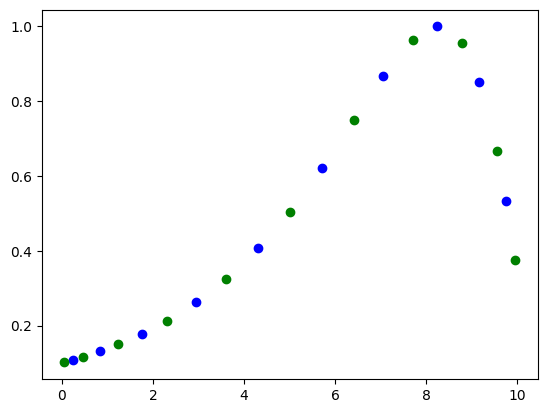

In [100]:
interval = chebyshev_series(a, b, int((b - a) / h) + 1)
interval0 = new_mid_arr(interval)

poly = Lagrange_polynomial(interval, f(interval))

solution = poly.solve_interpolation(interval0)

plt.scatter(interval0, solution, c="blue")
plt.scatter(interval, f(interval), c="green")